#### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Company wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [2]:
# Reading given data
data=pd.read_csv('day.csv')

In [3]:
# Inital glance of data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking data size 
# Inference - data has 730 rows and 16 columns
data.shape

(730, 16)

In [5]:
# Basic statistics of data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for information about individual columns, presence of Null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Observing Categorical values

In [7]:
data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
data.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [9]:
data.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [10]:
data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [11]:
data.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [12]:
data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [13]:
data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

## Step2: Data Cleaning
Approach: 
1. Remove nonsignificant columns. 
2. Encoding wherever needed as per information provided in DataDictionary



In [14]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
# Dropping two columns casual and registered which summed up to give cnt
data.drop(['casual', 'registered'],axis=1,inplace=True)

In [16]:
data.shape

(730, 14)

In [17]:
# Encoding data with categorical string variable with reference to data dictionary
data.season=data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

data.weathersit=data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'})

data.mnth = data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

data.weekday = data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
data.yr=data.yr.replace({0:'2018',1:'2019'})

In [18]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
data['dteday']=pd.to_datetime(data['dteday'],format='%d-%m-%Y')

In [20]:
data['day']=data['dteday'].dt.day

In [21]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,2018-01-01,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,1
1,2,2018-01-02,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,2
2,3,2018-01-03,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,3
3,4,2018-01-04,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,4
4,5,2018-01-05,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,5


In [22]:
# dropping instant as it is just the index value. Day value is already extracted from the given date. 
# Month and year are already available as part of dataset. So dteday can be dropped

data.drop(['instant','dteday'],axis=1,inplace=True)

In [23]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,5


In [24]:
# Rearranging columns for convenience
data=data.reindex(columns=[ 'yr', 'mnth','day', 'holiday', 'weekday', 'workingday',
       'weathersit', 'season','temp', 'atemp', 'hum', 'windspeed', 'cnt'])

In [25]:
data.head()

,yr,mnth,day,holiday,weekday,workingday,weathersit,season,temp,atemp,hum,windspeed,cnt
0,2018,jan,1,0,sat,0,moderate,spring,14.110847,18.18125,80.5833,10.749882,985
1,2018,jan,2,0,sun,0,moderate,spring,14.902598,17.68695,69.6087,16.652113,801
2,2018,jan,3,0,mon,1,good,spring,8.050924,9.47025,43.7273,16.636703,1349
3,2018,jan,4,0,tue,1,good,spring,8.200000,10.60610,59.0435,10.739832,1562
4,2018,jan,5,0,wed,1,good,spring,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# Identifying numerical and non-numerical values
num_values=['temp', 'atemp', 'hum', 'windspeed','cnt']
cat_values=['yr', 'mnth','day', 'holiday', 'weekday', 'workingday','weathersit','season']

## Step 3: EDA and Data Visualisation

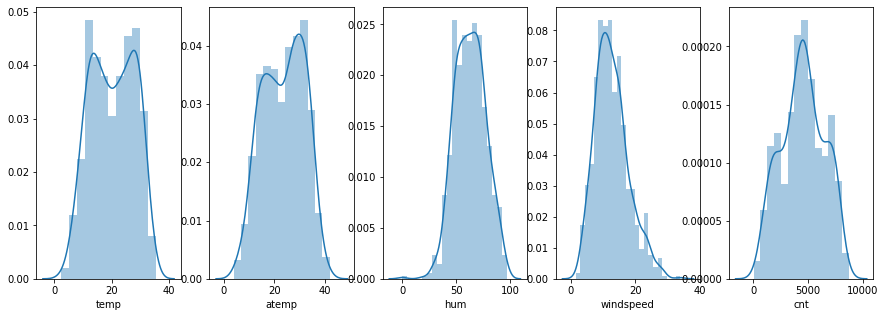

In [27]:
# distribution of continuous variables
plt.figure(figsize=(15,5))
i=1
for col in num_values:
    plt.subplot(1,5,i)
    sns.distplot(data[col])
    i=i+1


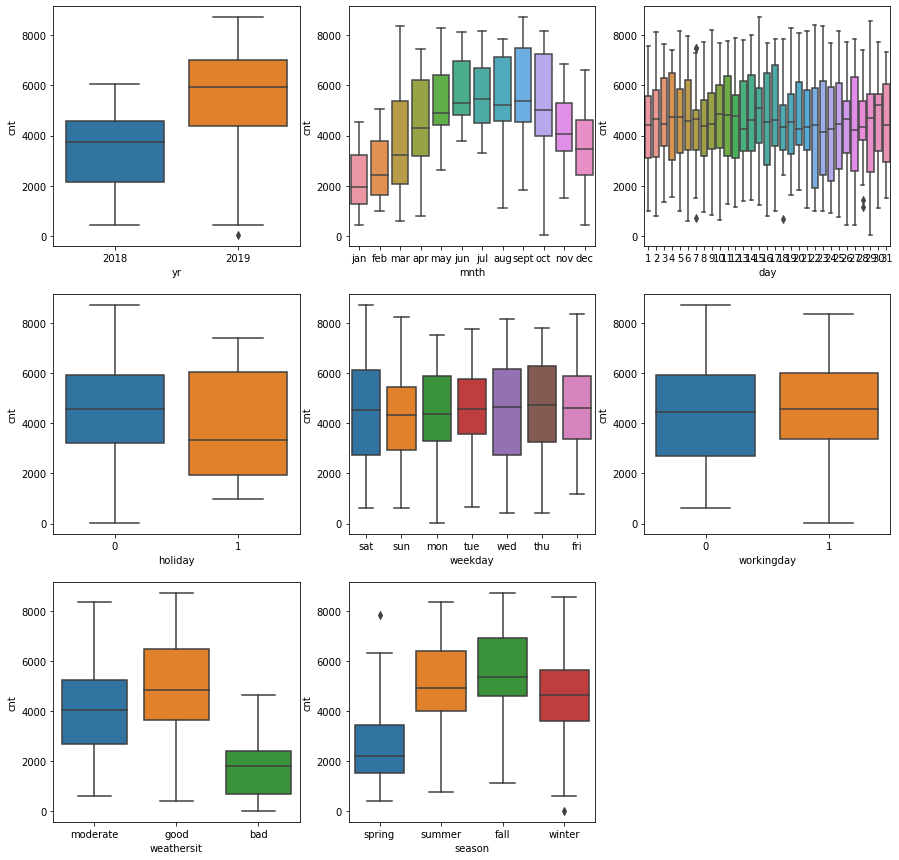

In [28]:
# Categorical variables against target variable
plt.figure(figsize=(15,15))
i=1
for col in cat_values:
    plt.subplot(3,3,i)
    sns.boxplot(x=col,y=data['cnt'],data=data)
    i=i+1
   

##### Inferences from above boxplots
1. Counts vary a lot during the months of March,April,August and October.
2. Number of rides are actually more during the period between May till July.
3. Count is more in 2018 compared to 2018.
4. Rides on holidays are more as obviously expected.
5. Day of the week doesnot create much impact.
6. Having a good Weathersit significantly affects the target variable.
7. Rides are more during Fall,followed by summer and significantly less during spring and winter.

<Figure size 720x720 with 0 Axes>

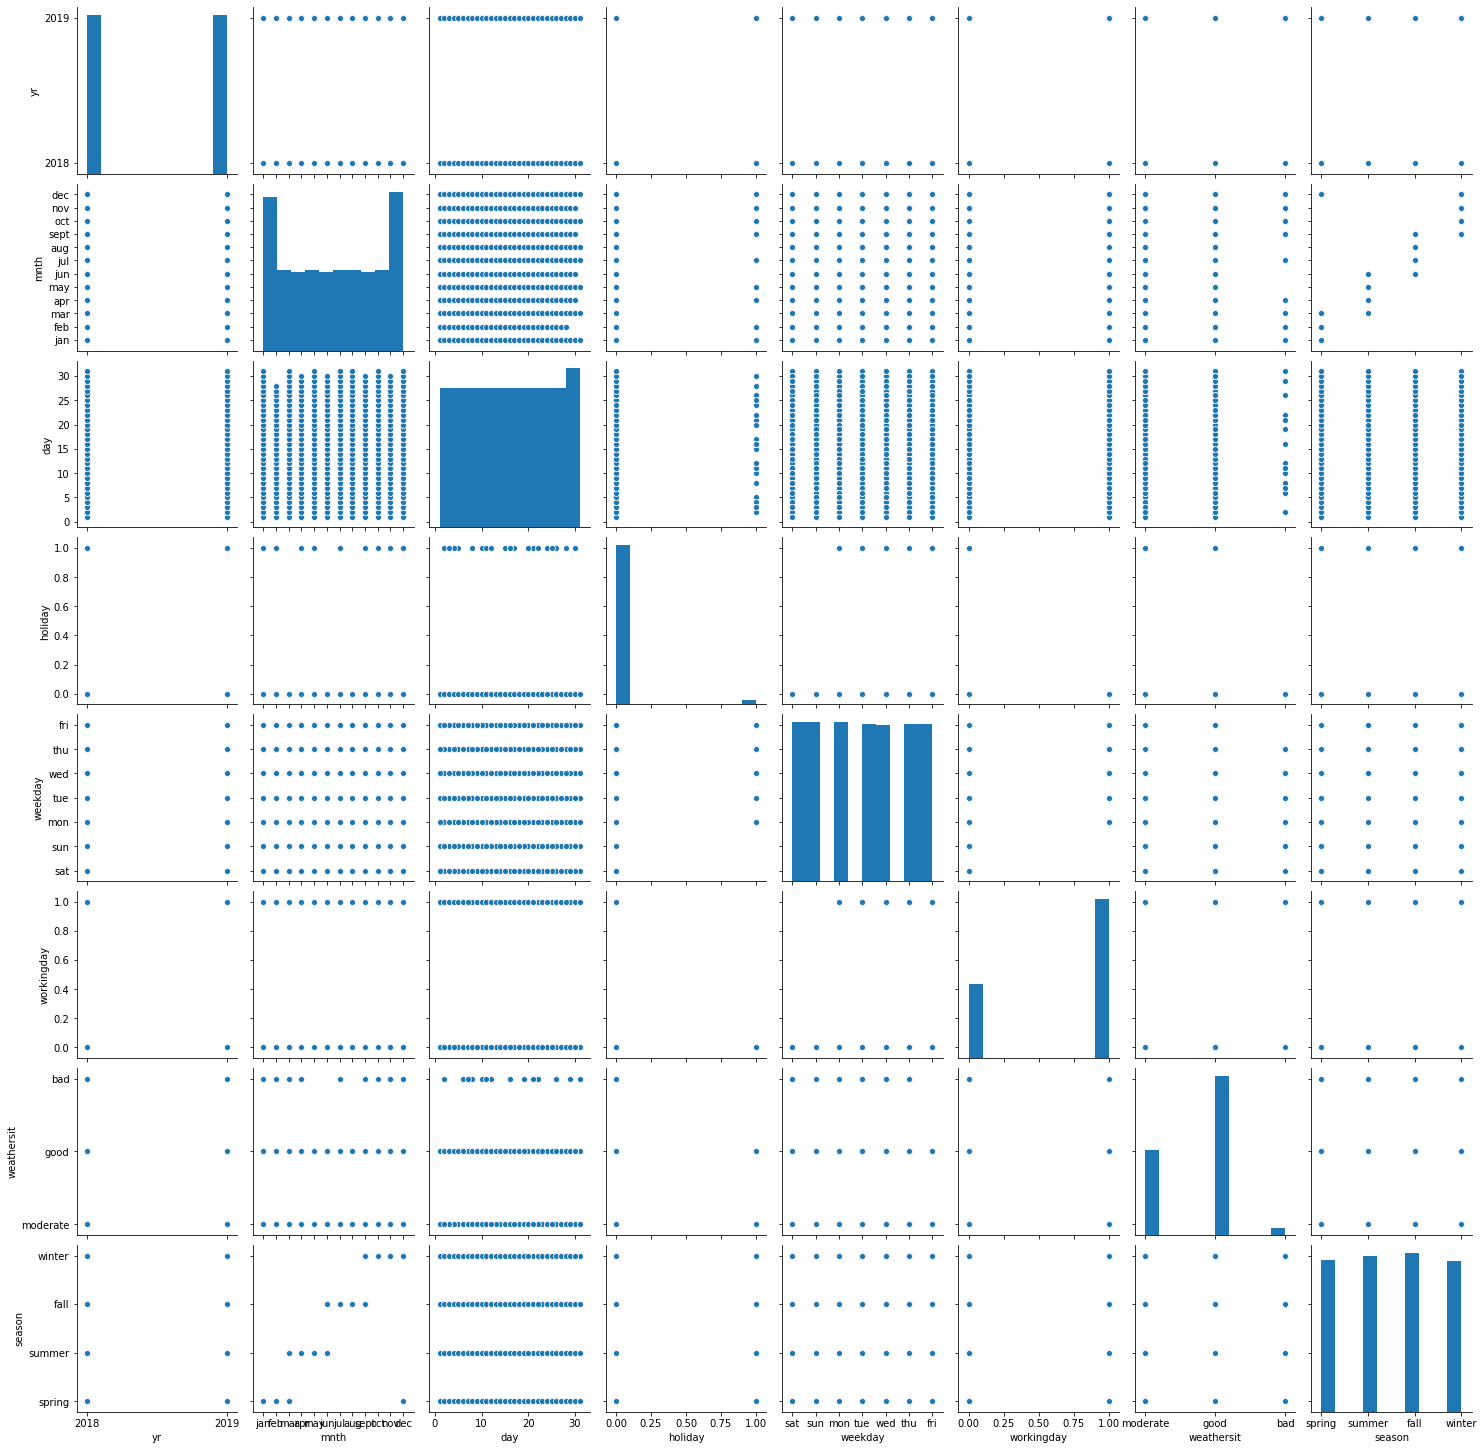

In [29]:
# Understanding linear relation in categorical values
plt.figure(figsize=(10,10))
sns.pairplot(data=data,vars=cat_values)

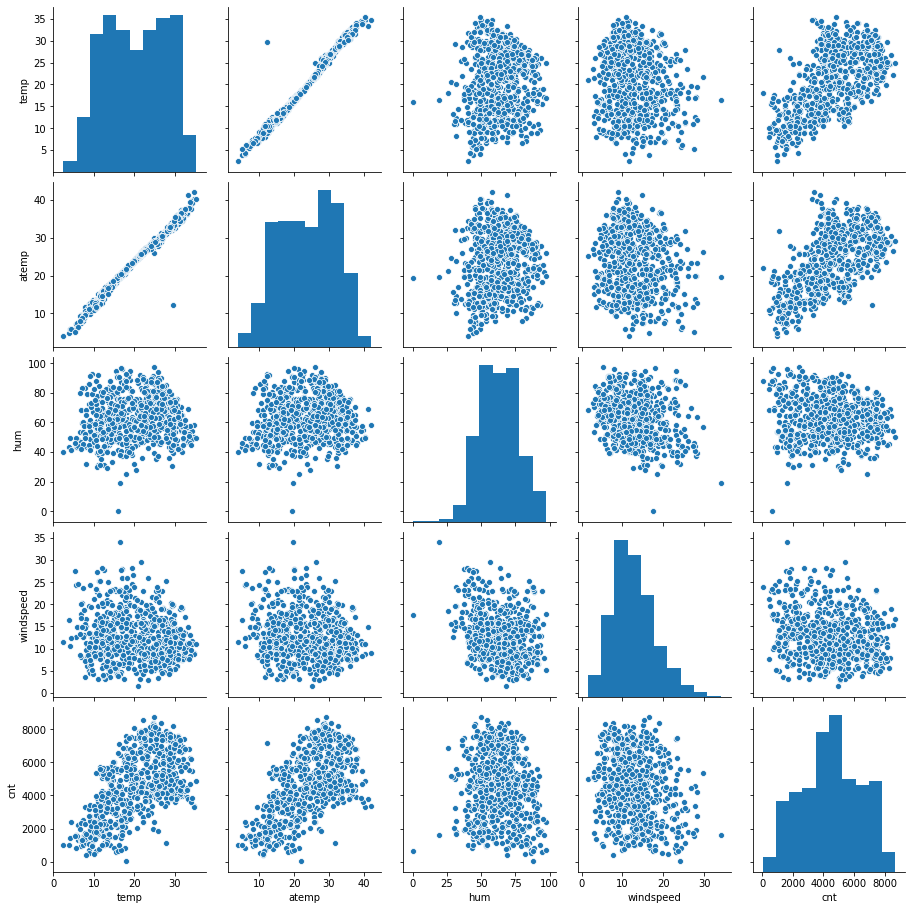

In [30]:
#Understanding linearity in numerical values
sns.pairplot(data=data,vars=num_values)

##### From above pairplots we understand variable cnt has linear relationship with temp and atemp. So these attributes will get significant importance in model building.

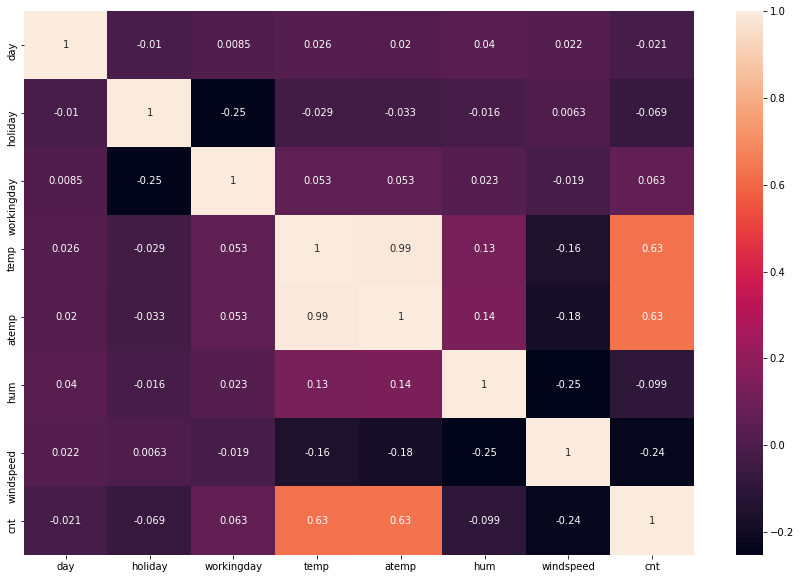

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

As inferred from above pairplots, correlation also shows temp and atemp having a strong correlation with the target variable.

## Step 4 : Data Preparation for Linear Regression

There are attributes with string values which can be encoded to get the best fit line during model building.

In [32]:
data.shape

(730, 13)

In [33]:
data.yr=data.yr.replace({'2018':0,'2019':1})

In [34]:
data=pd.get_dummies(data=data,columns=['mnth', 'weekday','season','weathersit'],drop_first=True)

In [35]:
data.shape

(730, 31)

In [36]:
data.columns

Index(['yr', 'day', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [37]:
data.head()

,yr,day,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_good,weathersit_moderate
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,1,0,0,0,0,1,0,0,0,1
1,0,2,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,1,0,0,0,1,0,0,0,1
2,0,3,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,1,0,0,1,0
3,0,4,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,1,0,1,0,0,1,0
4,0,5,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,1,1,0,0,1,0


## Step5 : Creating data sets for Model building

In [38]:
data_train,data_test= train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [39]:
print("Train set size:",data_train.shape)
print("Test set size:",data_test.shape)

Train set size: (510, 31)
Test set size: (219, 31)


In [40]:
# Rescaling using MinMaxscaler
scaler=MinMaxScaler(feature_range=(0, 1))

In [41]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [42]:
data_train.describe()

,yr,day,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,15.613725,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.243137,0.245098,0.24902,0.627451,0.343137
std,0.500429,8.899450,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.429398,0.430568,0.43287,0.483958,0.475223
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,16.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,1.000000,23.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


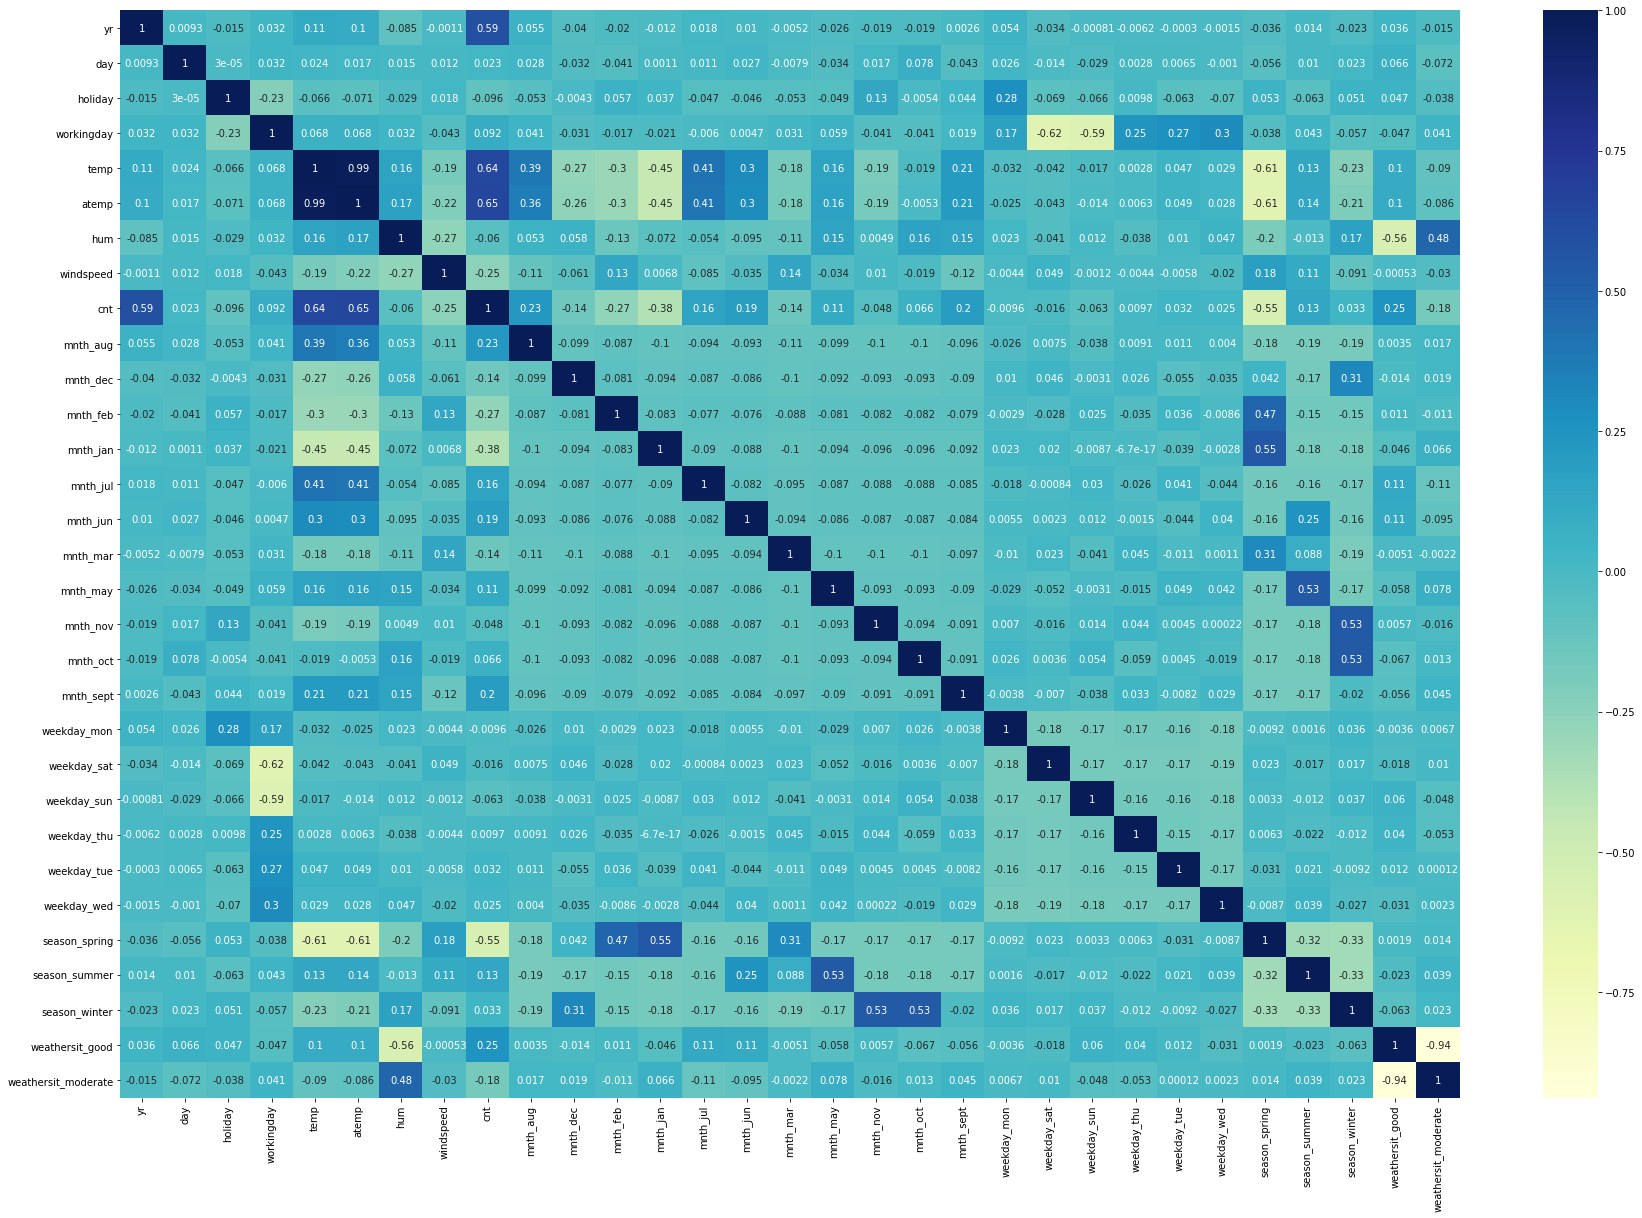

In [43]:
# Observe correlation 
plt.figure(figsize=(30,20))
sns.heatmap(data_train.corr(),annot=True,cmap="YlGnBu")

Looks like cnt has got a stronger correlation with temp and atemp.

## Step 6 : Building Linear Model

### Data split for Model building

In [44]:
y_train = data_train.pop('cnt')
X_train = data_train

In [45]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
rfe=rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('day', False, 11),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 10),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 7),
 ('weekday_tue', False, 5),
 ('weekday_wed', False, 8),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [49]:
X_train_rfe=X_train[col]

In [50]:
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weekday_sun,season_spring,season_summer,season_winter,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,1,0,1,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,1,1,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,1,0,0,1,0,0,1


In [51]:
X_train_rfe.shape


(510, 20)

#### Checking VIF

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,99.54
3,temp,59.16
4,atemp,53.88
13,weekday_sat,23.26
14,weekday_sun,22.47
18,weathersit_good,10.47
19,weathersit_moderate,8.99
15,season_spring,5.79
1,holiday,4.97
17,season_winter,3.98


In [53]:
#Build model using statsmodels
X_train_lm1=sm.add_constant(X_train_rfe)

In [54]:
lm1=sm.OLS(y_train,X_train_lm1).fit()

In [55]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          4.47e-189
Time:                        07:24:34   Log-Likelihood:                 525.16
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0333      0.038      0.864      0.388      -0.042       0.109
yr                      0.2311      0.008     29.052      0.000       0.215       0.247
holiday                -0.0537      0.023     -2.368      0.018      -0.098      -0.009
workingday              0.0405      0.011      3.548      0.000       0.018       0.063
temp                    0.4422      0.133      3.323      0.001       0.181       0.704
atemp                   0.0186      0.135      0.138      0.890      -0.247       0.284
hum                    -0.1458      0.037     -3.902      0.000      -0.219      -0.072
windspeed              -0.1880      0.026     -7.267      0.000      -0.239      -0.137
mnth_dec               -0.0492      0.018     -2.725      0.007      -0.085      -0.014
mnth_feb               -0.0339      0.021     -1.588      0.113      -0.076       0.008
mnth_jan               -0.0639      0.021     -3.017      0.003      -0.106      -0.022
mnth_jul               -0.0519      0.018     -2.883      0.004      -0.087      -0.017
mnth_nov               -0.0466      0.019     -2.497      0.013      -0.083      -0.010
mnth_sept               0.0716      0.017      4.297      0.000       0.039       0.104
weekday_sat             0.0503      0.013      3.859      0.000       0.025       0.076
weekday_sun            -0.0039      0.014     -0.279      0.780      -0.031       0.023
season_spring          -0.0522      0.022     -2.384      0.018      -0.095      -0.009
season_summer           0.0373      0.016      2.404      0.017       0.007       0.068
season_winter           0.1030      0.018      5.720      0.000       0.068       0.138
weathersit_good         0.2581      0.026      9.880      0.000       0.207       0.309
weathersit_moderate     0.1981      0.025      8.035      0.000       0.150       0.247
==============================================================================
Omnibus:                       81.677   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.847
Skew:                          -0.789   Prob(JB):                     1.82e-48
Kurtosis:                       5.803   Cond. No.                     9.61e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Considering the highest P-value from above observations in 'weekday_sun' let us try removing this column and check for VIF again

#### Model 2
With new updated dataset after removing weekday_sun

In [56]:
X_train_update=X_train_rfe.drop(['weekday_sun'],axis=1)

VIF check with updated dataset

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_update.columns
vif['VIF'] = [variance_inflation_factor(X_train_update.values, i) for i in range(X_train_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,383.98
4,atemp,367.52
5,hum,27.13
17,weathersit_good,16.35
18,weathersit_moderate,9.53
14,season_spring,6.69
2,workingday,5.45
6,windspeed,4.99
16,season_winter,4.70
15,season_summer,3.46


In [58]:
X_train_lm2=sm.add_constant(X_train_update)

In [59]:
lr2=sm.OLS(y_train,X_train_lm2).fit()

In [60]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          4.47e-189
Time:                        07:24:34   Log-Likelihood:                 525.16
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0294      0.049      0.600      0.548      -0.067       0.125
yr                      0.2311      0.008     29.052      0.000       0.215       0.247
holiday                -0.0498      0.027     -1.848      0.065      -0.103       0.003
workingday              0.0444      0.011      3.875      0.000       0.022       0.067
temp                    0.4422      0.133      3.323      0.001       0.181       0.704
atemp                   0.0186      0.135      0.138      0.890      -0.247       0.284
hum                    -0.1458      0.037     -3.902      0.000      -0.219      -0.072
windspeed              -0.1880      0.026     -7.267      0.000      -0.239      -0.137
mnth_dec               -0.0492      0.018     -2.725      0.007      -0.085      -0.014
mnth_feb               -0.0339      0.021     -1.588      0.113      -0.076       0.008
mnth_jan               -0.0639      0.021     -3.017      0.003      -0.106      -0.022
mnth_jul               -0.0519      0.018     -2.883      0.004      -0.087      -0.017
mnth_nov               -0.0466      0.019     -2.497      0.013      -0.083      -0.010
mnth_sept               0.0716      0.017      4.297      0.000       0.039       0.104
weekday_sat             0.0542      0.014      3.758      0.000       0.026       0.083
season_spring          -0.0522      0.022     -2.384      0.018      -0.095      -0.009
season_summer           0.0373      0.016      2.404      0.017       0.007       0.068
season_winter           0.1030      0.018      5.720      0.000       0.068       0.138
weathersit_good         0.2581      0.026      9.880      0.000       0.207       0.309
weathersit_moderate     0.1981      0.025      8.035      0.000       0.150       0.247
==============================================================================
Omnibus:                       81.677   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.847
Skew:                          -0.789   Prob(JB):                     1.82e-48
Kurtosis:                       5.803   Cond. No.                         91.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since attribute 'atemp' has the highest VIF value, we can try removing the attribute and observe change in VIF values

#### Model 3

In [61]:
X_train_update=X_train_update.drop(['atemp'],axis=1)

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_update.columns
vif['VIF'] = [variance_inflation_factor(X_train_update.values, i) for i in range(X_train_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.12
3,temp,26.97
16,weathersit_good,16.32
17,weathersit_moderate,9.52
13,season_spring,6.59
2,workingday,5.45
5,windspeed,4.72
15,season_winter,4.56
14,season_summer,3.33
8,mnth_jan,2.52


In [63]:
X_train_lm3=sm.add_constant(X_train_update)

In [64]:
lr3=sm.OLS(y_train,X_train_lm3).fit()

In [65]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          3.55e-190
Time:                        07:24:34   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290      0.049      0.594      0.553      -0.067       0.125
yr                      0.2311      0.008     29.082      0.000       0.215       0.247
holiday                -0.0499      0.027     -1.857      0.064      -0.103       0.003
workingday              0.0443      0.011      3.878      0.000       0.022       0.067
temp                    0.4598      0.038     12.233      0.000       0.386       0.534
hum                    -0.1456      0.037     -3.904      0.000      -0.219      -0.072
windspeed              -0.1887      0.025     -7.440      0.000      -0.239      -0.139
mnth_dec               -0.0491      0.018     -2.727      0.007      -0.085      -0.014
mnth_feb               -0.0339      0.021     -1.591      0.112      -0.076       0.008
mnth_jan               -0.0640      0.021     -3.025      0.003      -0.106      -0.022
mnth_jul               -0.0517      0.018     -2.883      0.004      -0.087      -0.016
mnth_nov               -0.0465      0.019     -2.499      0.013      -0.083      -0.010
mnth_sept               0.0718      0.017      4.319      0.000       0.039       0.104
weekday_sat             0.0542      0.014      3.761      0.000       0.026       0.083
season_spring          -0.0518      0.022     -2.390      0.017      -0.094      -0.009
season_summer           0.0377      0.015      2.483      0.013       0.008       0.068
season_winter           0.1035      0.018      5.852      0.000       0.069       0.138
weathersit_good         0.2583      0.026      9.924      0.000       0.207       0.309
weathersit_moderate     0.1983      0.025      8.067      0.000       0.150       0.247
==============================================================================
Omnibus:                       81.478   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.245
Skew:                          -0.787   Prob(JB):                     2.46e-48
Kurtosis:                       5.800   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we  can remove 'mnth_feb' because of its high VIF value  in comparison with others

#### Model 4

In [66]:
X_train_update=X_train_update.drop(['mnth_feb'],axis=1)

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_update.columns
vif['VIF'] = [variance_inflation_factor(X_train_update.values, i) for i in range(X_train_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.66
3,temp,25.65
15,weathersit_good,15.94
16,weathersit_moderate,9.39
12,season_spring,5.82
2,workingday,5.44
5,windspeed,4.72
14,season_winter,4.56
13,season_summer,3.31
0,yr,2.10


In [68]:
X_train_lm4=sm.add_constant(X_train_update)

In [69]:
lr4=sm.OLS(y_train,X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          9.55e-191
Time:                        07:24:34   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0188      0.048      0.389      0.698      -0.076       0.114
yr                      0.2308      0.008     29.005      0.000       0.215       0.246
holiday                -0.0520      0.027     -1.933      0.054      -0.105       0.001
workingday              0.0445      0.011      3.889      0.000       0.022       0.067
temp                    0.4750      0.036     13.038      0.000       0.403       0.547
hum                    -0.1474      0.037     -3.949      0.000      -0.221      -0.074
windspeed              -0.1876      0.025     -7.388      0.000      -0.237      -0.138
mnth_dec               -0.0405      0.017     -2.351      0.019      -0.074      -0.007
mnth_jan               -0.0458      0.018     -2.570      0.010      -0.081      -0.011
mnth_jul               -0.0526      0.018     -2.932      0.004      -0.088      -0.017
mnth_nov               -0.0420      0.018     -2.277      0.023      -0.078      -0.006
mnth_sept               0.0732      0.017      4.404      0.000       0.041       0.106
weekday_sat             0.0550      0.014      3.813      0.000       0.027       0.083
season_spring          -0.0611      0.021     -2.925      0.004      -0.102      -0.020
season_summer           0.0409      0.015      2.708      0.007       0.011       0.071
season_winter           0.1052      0.018      5.949      0.000       0.070       0.140
weathersit_good         0.2571      0.026      9.865      0.000       0.206       0.308
weathersit_moderate     0.1973      0.025      8.016      0.000       0.149       0.246
==============================================================================
Omnibus:                       76.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.539
Skew:                          -0.747   Prob(JB):                     2.33e-45
Kurtosis:                       5.727   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 5

In [70]:
X_train_update=X_train_update.drop(['hum'],axis=1)

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train_update.columns
vif['VIF'] = [variance_inflation_factor(X_train_update.values, i) for i in range(X_train_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,weathersit_good,15.93
3,temp,15.14
15,weathersit_moderate,8.97
2,workingday,5.38
4,windspeed,4.71
11,season_spring,4.55
13,season_winter,3.42
12,season_summer,2.81
0,yr,2.08
10,weekday_sat,2.01


In [72]:
X_train_lm5=sm.add_constant(X_train_update)

In [73]:
lr5=sm.OLS(y_train,X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.49e-188
Time:                        07:24:34   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0932      0.040     -2.339      0.020      -0.171      -0.015
yr                      0.2345      0.008     29.241      0.000       0.219       0.250
holiday                -0.0499      0.027     -1.827      0.068      -0.104       0.004
workingday              0.0475      0.012      4.096      0.000       0.025       0.070
temp                    0.4360      0.036     12.254      0.000       0.366       0.506
windspeed              -0.1604      0.025     -6.467      0.000      -0.209      -0.112
mnth_dec               -0.0474      0.017     -2.731      0.007      -0.082      -0.013
mnth_jan               -0.0520      0.018     -2.882      0.004      -0.087      -0.017
mnth_jul               -0.0478      0.018     -2.630      0.009      -0.083      -0.012
mnth_nov               -0.0429      0.019     -2.291      0.022      -0.080      -0.006
mnth_sept               0.0669      0.017      3.989      0.000       0.034       0.100
weekday_sat             0.0598      0.015      4.097      0.000       0.031       0.088
season_spring          -0.0701      0.021     -3.327      0.001      -0.112      -0.029
season_summer           0.0340      0.015      2.237      0.026       0.004       0.064
season_winter           0.0917      0.018      5.212      0.000       0.057       0.126
weathersit_good         0.2987      0.024     12.347      0.000       0.251       0.346
weathersit_moderate     0.2152      0.025      8.769      0.000       0.167       0.263
==============================================================================
Omnibus:                       80.436   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.289
Skew:                          -0.770   Prob(JB):                     8.87e-49
Kurtosis:                       5.836   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model 6

In [74]:
X_train_update=X_train_update.drop(['holiday'],axis=1)

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_update.columns
vif['VIF'] = [variance_inflation_factor(X_train_update.values, i) for i in range(X_train_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_good,15.86
2,temp,15.01
14,weathersit_moderate,8.94
1,workingday,4.76
3,windspeed,4.70
10,season_spring,4.51
12,season_winter,3.41
11,season_summer,2.81
0,yr,2.08
9,weekday_sat,1.86


In [76]:
X_train_lm6=sm.add_constant(X_train_update)

In [77]:

lr6=sm.OLS(y_train,X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          5.71e-189
Time:                        07:24:34   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0981      0.040     -2.462      0.014      -0.176      -0.020
yr                      0.2346      0.008     29.196      0.000       0.219       0.250
workingday              0.0548      0.011      5.027      0.000       0.033       0.076
temp                    0.4344      0.036     12.184      0.000       0.364       0.504
windspeed              -0.1610      0.025     -6.479      0.000      -0.210      -0.112
mnth_dec               -0.0483      0.017     -2.778      0.006      -0.083      -0.014
mnth_jan               -0.0528      0.018     -2.924      0.004      -0.088      -0.017
mnth_jul               -0.0469      0.018     -2.575      0.010      -0.083      -0.011
mnth_nov               -0.0469      0.019     -2.518      0.012      -0.083      -0.010
mnth_sept               0.0648      0.017      3.859      0.000       0.032       0.098
weekday_sat             0.0671      0.014      4.777      0.000       0.040       0.095
season_spring          -0.0717      0.021     -3.394      0.001      -0.113      -0.030
season_summer           0.0338      0.015      2.219      0.027       0.004       0.064
season_winter           0.0919      0.018      5.209      0.000       0.057       0.127
weathersit_good         0.2980      0.024     12.291      0.000       0.250       0.346
weathersit_moderate     0.2149      0.025      8.737      0.000       0.167       0.263
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
X_train_update=X_train_update.drop(['weathersit_moderate'],axis=1)

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train_update.columns
vif['VIF'] = [variance_inflation_factor(X_train_update.values, i) for i in range(X_train_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.77
1,workingday,4.67
3,windspeed,4.66
10,season_spring,3.20
12,season_winter,2.95
13,weathersit_good,2.74
11,season_summer,2.30
0,yr,2.07
9,weekday_sat,1.84
7,mnth_nov,1.78


In [80]:
X_train_lm7=sm.add_constant(X_train_update)

In [81]:
lr7=sm.OLS(y_train,X_train_lm7).fit()

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          9.43e-175
Time:                        07:24:34   Log-Likelihood:                 477.53
No. Observations:                 510   AIC:                            -925.1
Df Residuals:                     495   BIC:                            -861.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0989      0.035      2.807      0.005       0.030       0.168
yr                  0.2382      0.009     27.650      0.000       0.221       0.255
workingday          0.0512      0.012      4.380      0.000       0.028       0.074
temp                0.4480      0.038     11.718      0.000       0.373       0.523
windspeed          -0.1825      0.027     -6.877      0.000      -0.235      -0.130
mnth_dec           -0.0370      0.019     -1.985      0.048      -0.074      -0.000
mnth_jan           -0.0436      0.019     -2.253      0.025      -0.082      -0.006
mnth_jul           -0.0526      0.020     -2.692      0.007      -0.091      -0.014
mnth_nov           -0.0368      0.020     -1.846      0.066      -0.076       0.002
mnth_sept           0.0628      0.018      3.488      0.001       0.027       0.098
weekday_sat         0.0632      0.015      4.193      0.000       0.034       0.093
season_spring      -0.0666      0.023     -2.940      0.003      -0.111      -0.022
season_summer       0.0394      0.016      2.407      0.016       0.007       0.071
season_winter       0.0824      0.019      4.358      0.000       0.045       0.120
weathersit_good     0.0992      0.009     11.038      0.000       0.082       0.117
==============================================================================
Omnibus:                      112.759   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.779
Skew:                          -0.989   Prob(JB):                     8.44e-86
Kurtosis:                       6.811   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X_train_update.head()

,yr,workingday,temp,windspeed,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weekday_sat,season_spring,season_summer,season_winter,weathersit_good
653,1,1,0.509887,0.300794,0,0,0,0,0,0,0,0,1,1
576,1,1,0.815169,0.264686,0,0,1,0,0,0,0,0,0,1
426,1,0,0.442393,0.255342,0,0,0,0,0,1,1,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,1,0,0,1
482,1,0,0.395666,0.188475,0,0,0,0,0,1,0,1,0,0


## Step7: Residual Analysis

In [83]:
y_train_lm7=lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

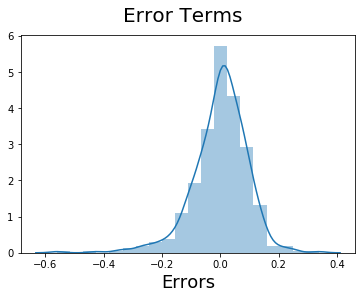

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_lm7), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Step 8 : Prediction using the model

Applying scaler on test set

In [85]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [86]:
data_test.describe()

,yr,day,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,16.018265,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.255708,0.264840,0.232877,0.652968,0.319635
std,0.500722,8.575067,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.437258,0.442259,0.423633,0.477117,0.467403
min,0.000000,1.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.500000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,24.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,31.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing X_test and y_test

In [87]:
y_test=data_test.pop('cnt')
X_test=data_test

In [88]:
col1=X_train_update.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
#X_test_lm6.info()

In [89]:
y_pred = lr7.predict(X_test_lm7)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

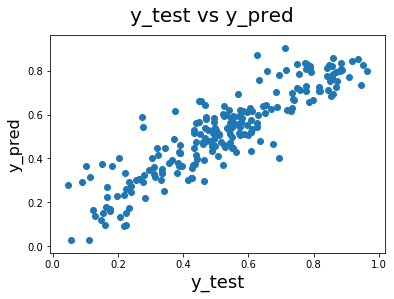

In [90]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [91]:
r2=r2_score(y_test, y_pred)
print("R2 =",r2)

n = X_test.shape[0] # n is number of rows in X
p = X_test.shape[1] # Number of features 

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adj-R2 = ",adjusted_r2)

R2 = 0.8041096712981995
Adj-R2 =  0.7906662173676838


#### Comparison of train and test stes

Train R^2 : 0.821,
Test R^2 : 0.804

Train Adj-R2: 0.816
Test Adj-R2 : 0.79